<img src="http://drive.google.com/uc?export=view&id=1JzM1Jig5KAOCvU4tIf2t66B3gd1uy1rG" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font>

## <font color='blue'> Divide and Conquer </font>

<font color='blue'>
    
* Divide and Conquer
* Breaking the problem into subproblems
* Problem Statements: Examples
    * Finding peak element
    * Finding Median
* Applications
</font>

# <font color='blue'> Divide and Conquer </font> 

Divide and conquer is a design strategy which is well known to breaking down efficiency barriers. When the method applies, it often leads to a large improvement in time complexity. For example, from O(n<sup>2</sup>) to O(n log n) to sort the elements. Divide and conquer strategy is as follows: 

- divide the problem instance into two or more smaller instances of the same problem, solve the smaller instances recursively, and assemble the solutions to form a solution of the original instance. 
    
- The recursion stops when an instance is reached which is too small to divide. When dividing the instance, one can either use whatever division comes most easily to hand or invest time in making the division carefully so that the assembly is simplified.

Divide and conquer algorithm consists of two parts:
    
- Divide : Divide the problem into a number of sub problems. The sub problems are solved recursively.
    
- Conquer : The solution to the original problem is then formed from the solutions to the sub problems (patching together the answers).

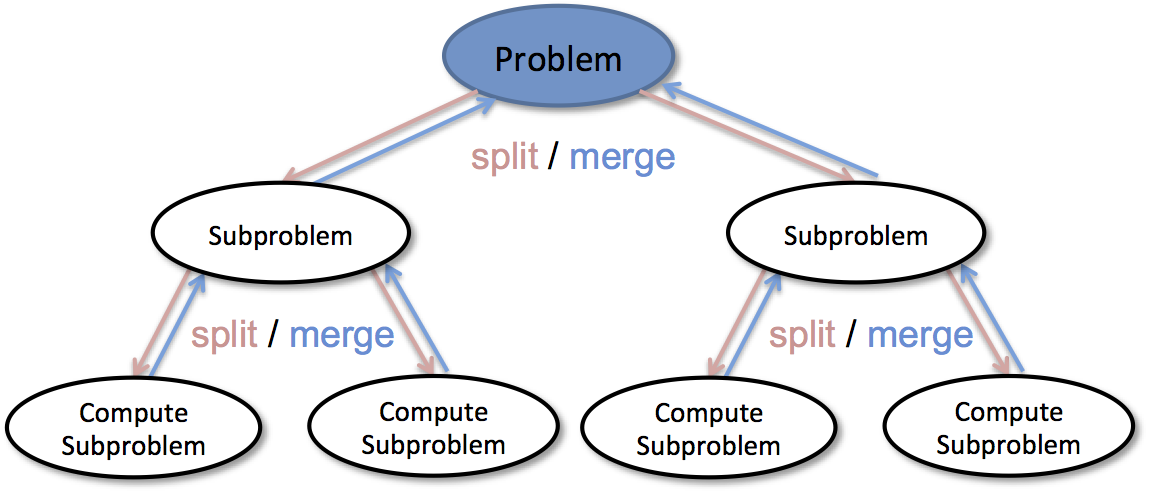

Traditionally, routines in which the text contains at least two recursive calls are called divide and conquer algorithms, while routines whose text contains only one recursive call are not. 

Divide–and–conquer is a very powerful use of recursion.


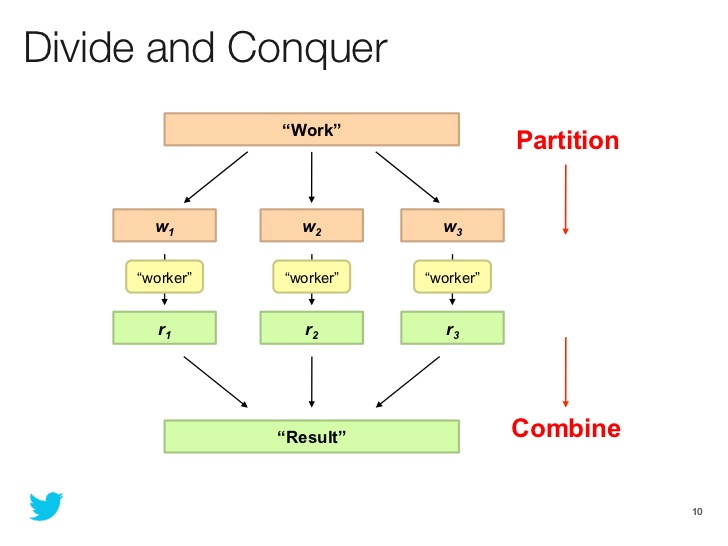


### <font color='blue'> Control Abstraction of D & C</font>

A control abstraction is a procedure whose flow of control is clear but whose primary operations are specified by other procedures whose precise meanings are left undefined. The control abstraction for divide and conquer technique is DANDC(A, P, Q), where A is the problem to be solved.


DANDC (A, P, Q)

    {
        if SMALL (A,P,Q) 
            then return Solution(A,P,Q);
        else
        {
            M = Divide(A, P, Q)
            L = DANDC(A, P, M)
            R = DANDC(A, M+1, Q)
            C = Combine(L, R)
            return C
        }
    }

SMALL (A, P, Q) is a Boolean valued function which determines whether the input size is small enough so that the answer can be computed without splitting. If this is so function ‘Solution’ is invoked otherwise, the problem ‘A’ into smaller sub problems. These sub problems a<sub>1</sub>, a<sub>2</sub>, . . . , a<sub>k</sub> are solved by recursive application of DANDC.

# <font color='blue'> Problem Statement </font>

You have a list of integers with all *unique entries*. These entries are unimodal. ***Unimodal*** - *a list that has only 1 single highest value.*   

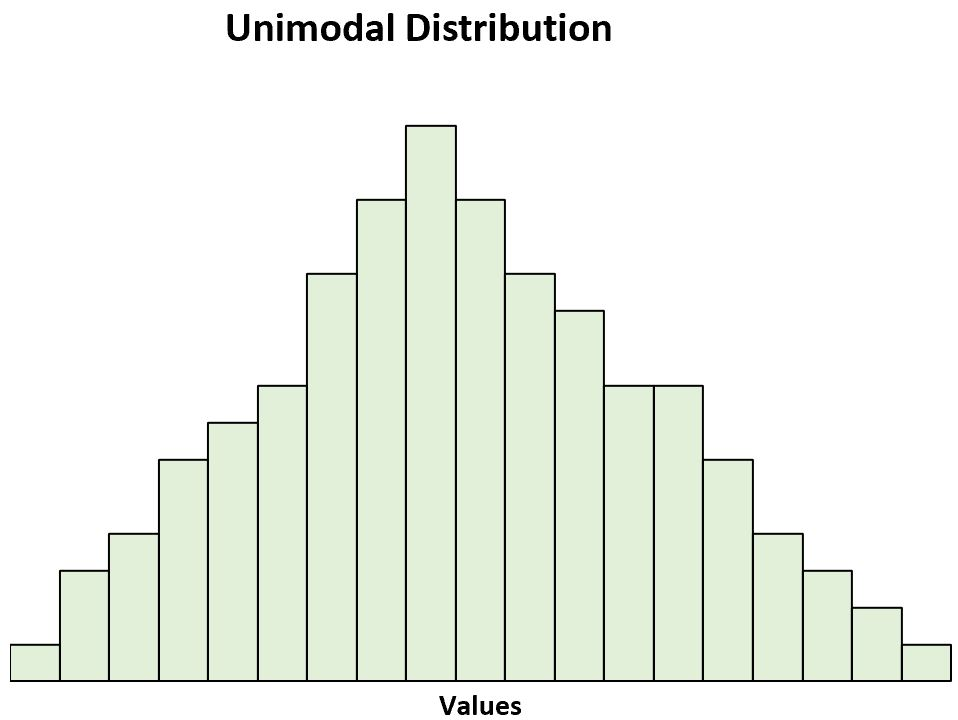



The list you have has entries from ${1}$ to ${n}$.  There is an index ${k}$ in this list.  
The values in the list are in increasing order from the beginning to the index ${k}$. After the index ${k}$ the values in the list are in decreasing order.  

Now the goal of this algorithm is to find the peak entry or the index ${k}$ without reading the entire list.  
***Intention*** here is to read as few entries as possible to identify the index ${k}$.  
In fact you have to achieve this with the time complexity of O${(log n)}$


## <font color='blue'> Brute force Solution </font>

In [ ]:
# Creating and pushing data in the list for example
data_list = [10, 20, 30, 40, 50, 45, 35, 25, 15, 5]

# In the worst case there will be no decrease pattern and last element will be the highest element
peak_index = len(data_list)-1

# running the loop to find the peak index in the list
for i in range(1, len(data_list)):
    if data_list[i-1] < data_list[i]:
        continue
    else:
        peak_index = i-1
        break
        
print("Peak value in the list is available at index position: {}".format(peak_index))

Peak value in the list is available at index position: 4


#### <font color='blue'> Analyis </font>

What do you think will be the time complexity? 

What will be the space complexity for the above algorithm?

## <font color='blue'> Discussion and Solution </font>

Now the question is how do we achieve this in ${O(log n)}$?  

The idea is to use the modified version of binary search. Of course, In binary search, we do the partition at the middle in sorted list/array. Subsequently we keep on dividing the list in the half and discarding the other half. 

Similar thing we are going to do for this problem statement as well. 

As a next step, lets write the algorithm for the problem statement and figure out a way to modify the binary search algorithm. 


In [ ]:
unimodal_lis = [1, 3, 2, 4, 7, 5, 6, 8, 9, 11, 10, 12, 18, 13, 14, 15,16, 17]

### <font color='blue'> Approach </font>

Now we look at the problem once again. And if we have to find the solution then we start with probing the mid point of the list.  
When we have the midpoint of the list, (we call it ${m}$) this does not guarantee that the value at the index ${m}$ is actually the highest value.  
The highest value can be on either side of the index ${m}$.  
So now we will check the indices on the either side of the index ${m}$.  And this gives the following possibilities... 
1. ${List[m]} \gt {List[m-1 ]}$ and ${List[m]} \gt {List[m+1]}$ - This is the peak entry. We can stop the check here and return the index.
2. ${List[m]} \gt {List[m-1 ]}$ and ${List[m]} \lt {List[m+1]}$ *in other words* ${List[m-1]} \lt {List[m]} \lt {List[m + 1]}$ in this case, we can continue recursively on the ***right*** side of the array.  
3. ${List[m]} \lt {List[m-1 ]}$ and ${List[m]} \gt {List[m+1]}$ *in other words* ${List[m-1]} \gt {List[m]} \gt {List[m + 1]}$ in this case, we can continue recursively on the ***left*** side of the array.  

As we analyze the above algorithm it is clear that at any point of time we are chossing 1, 2 or 3. All these choices are mutually exclusive i.e. choosing any of the option automatically means that other two are false and now probing will take place for the chosen range of elements only. 


### <font color='blue'> Python solution </font>

In [ ]:
# Recursive function to find a peak in the list
def find_peak(A, start, end):
 
    # Calculate the middle element. 
    # Using `left + (right - left) / 2` to avoid overflow
    mid = (start + end) // 2
 
    # Perform following if middle element is greater than its neighbors
    if ((mid == 0 or A[mid - 1] <= A[mid]) and (mid == len(A) - 1 or A[mid + 1] <= A[mid])):
        return mid
 
    # Perform following, If the left neighbor of `mid` is greater than the middle element,
    # recursive call to find peak in the left list
    if mid - 1 >= 0 and A[mid - 1] > A[mid]:
        return find_peak(A, start, mid - 1)
 
    # Perform following, If the right neighbor of `mid` is greater than the middle element,
    # recursive call to find peak in the right list
    return find_peak(A, mid + 1, end)


if __name__ == '__main__':

    # Data set on which we are going to perform the search operation
    # A = [10, 20, 30, 40, 50, 45, 35, 25, 15, 5]
    A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 17, 16, 15, 14, 13] # WIth this the program fails
    end = 18
    start = 0
    # calling the findPeakElement method to perform the operation
    peak_index = find_peak(A, start, end)
    print("Peak value in the list is available at index position: {}".format(peak_index))

Peak value in the list is available at index position: 12


#### <font color='blue'> To Do for learners </font>

Can you write an iterative solution for the same problem statement? 

## <font color='blue'> Problem Statement - 2 </font>

We have 2 tables T1 and T2. Both the tables contain ${n}$ integer values. Total of ${n}$ values. These are the folloiwng assumption with respect to the elements: 

1. One assumption is that the entries in both the tables (combined together) are unique. For example, *if we have value 5 in T1 then it will not exist in T2.*   

2. Second these tables contain only the integer values.  
3. Both of the lists are sorted in nature. 

You have to determine the median of these ${2n}$ values. You can access these values of 2 tables by querying the tables.

In a single query, you can specify an index number ${k}$ to fetch from either one of the tables. And the result will fetch the ${k^{th}}$ smallest value from the selected table. 

Since such queries are expensive, you have to compute the median use as few queries as possible.   

***Median*** - *The median is the middle number in a sorted, ascending or descending, list of numbers*, for odd length lists, it is middle element. For even length lists it is average list[mid] and list[mid+1] elements.  

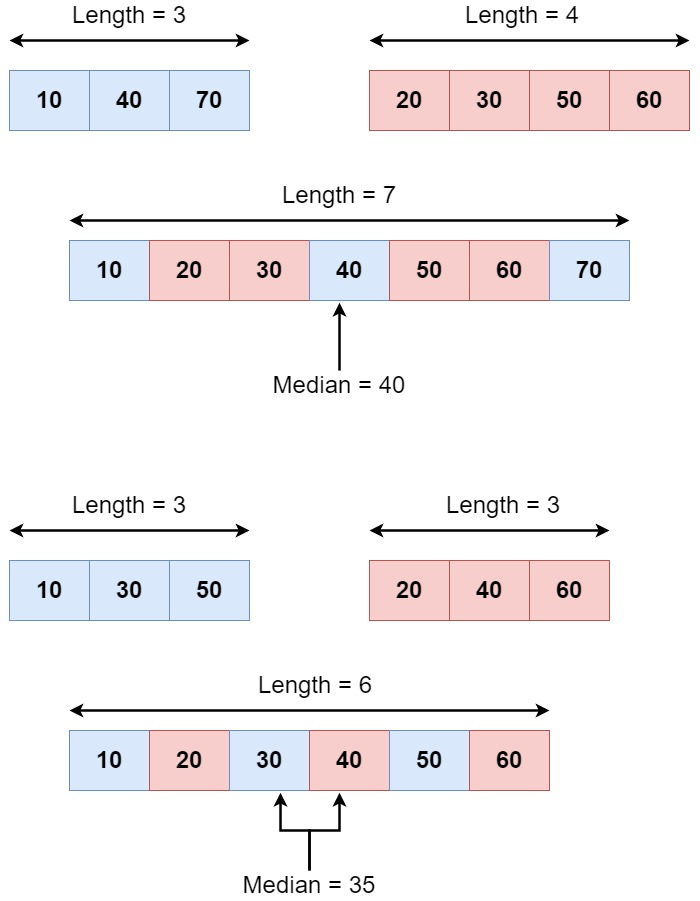


Give an algorithm that finds the median value using at most O(log n) queries.


## <font color='blue'> Brute force solution </font>

In [ ]:
# Brute force approach to find the median of two sorted arrays
 
# Method to find the median in the two sorted arrays
# putting n and m as different variable so that access of both lists can be treated separately

def median(ar1, ar2, n, m) :
 
    i = 0 
    j = 0 
    
    # Initializing m1 and m2 for final calculation 
    # Combined lnegth of lists will always be even hence 
    # defining two mid elements 
    mid1, mid2 = -1, -1
 
    # median for even length array is sum of two middle elements
    # running the loop for n+1 times
    for count in range(((n + m) // 2) + 1) :        
        mid2 = mid1
        if(i != n and j != m) :       
            if ar1[i] > ar2[j] :
                mid1 = ar2[j]
                j += 1
            else :
                mid1 = ar1[i]
                i += 1   
                
        # for case if i<n
        elif(i < n) :           
            mid1 = ar1[i]
            i += 1

        # for case if j<m,
        else :           
            mid1 = ar2[j]
            j += 1       
    return float((mid1 + mid2)/2)

    
if __name__ == '__main__':

    n = 5
    db_ar1 = [10, 23, 25, 26, 39]
    db_ar2 = [20, 24, 27, 30, 45]
    #ar = sorted(db_ar1+db_ar2)
    #print(ar)

    print("Median of combined sorted arrays are: ", median(db_ar1, db_ar2, n, n))
    
    db_ar1 = [1, 2, 3, 4, 5]
    db_ar2 = [10, 20, 27, 30, 45]
    #ar = sorted(db_ar1+db_ar2)
    #print(ar)

    print("Median of combined sorted arrays are: ", median(db_ar1, db_ar2, n, n))
    
    db_ar1 = [10, 20, 27, 30, 45]
    db_ar2 = [1, 2, 3, 4, 5]
    #ar = sorted(db_ar1+db_ar2)
    #print(ar)

    print("Median of combined sorted arrays are: ", median(db_ar1, db_ar2, n, n))

Median of combined sorted arrays are:  25.5
Median of combined sorted arrays are:  7.5
Median of combined sorted arrays are:  7.5


#### <font color='blue'> Analyis </font>

What do you think will be the time complexity? 

What will be the space complexity for the above algorithm?

## <font color='blue'> Discussion and Solution </font>

Similar to the previous problem, We need to solve the given problem in $O(logn)$ time. Similar to the previous problem lets focus on what approach we can take to solve the problem. 

We will try to find a pattern and see if this makes it possible to write an algorithm that has time complexity of $O(log n)$.   

We know both the arrays are sorted, which means we can utilize the Binary search to divide the list and find median of the combined two lists. 

1. In the above solution, the two lists are not merged. In order to get the median, merging operation is required, which we did as part of brute force approach.   
      
2. This turns out to be a costly operation. Our goal is not to perform the merge operation but, use the modified binary search  algorithm to solve the problem. 

### <font color='blue'> Approach </font>



As we are now aware of the properties of median. In this approach we will take the advantage of the fact that list is sorted and we will compare the medians of both the arrays. Lets start formulating the solution

* If the first median is greater than the second median then we will look for the median of the two sorted arrays in db_ar1[0 to median1] and db_ar2[median2 to n]. **Why?**

    * lets focus on median1, we know median1 will be greater than all the element of db_ar1[0 to index of median1] and smaller than all the elements in the second half of the db_ar1 list. **RIGHT?** 
    * For median2, similar to the above, all elements in db_ar2[0 to index of median2] will be smaller than median2 and all the elements in the second half of db_ar2 will be greater than median2. 
    
    * If we assume that median1 > median2 it means
    
        db_ar1= [...... median1 ......]
        
        db_ar2= [...... median2 ......]

        db_ar1 + db_ar2 = [...... median2 ..... median1 ......]


If our third assumption is correct it means that the first halves of db_ar1 and db_ar2 will always come before median1. 

So this means that no values larger than median1 need to be considered in db_ar1. So we only need to look in the first half or db_ar1.

Similarly, for the second halves of db_ar1 and db-ar2 that is coming after median1. This means that no values smaller than median2 need to be considered and we only need to look in the second half of db_ar2.

Lets look at the following example: 

```
db_ar1 = [10, 23, 25, 26, 39]
db_ar2 = [20, 24, 27, 30, 45]

median1 belongs to db_ar1 & median2 belongs to db_ar2. 

median1 = 25;  for db_ar1[0 to 4]
median2 = 27;  for db_ar1[0 to 4]

median1 < median2 i.e.

So median is present in {25, 26, 39} and {20, 24, 27}

Lets again look at the updated lists: 

median1 = 26
median2 = 24

median1 > median2. 

So median is present in {25, 26} and {24, 27}

The size of both the subarrays are now 2. So,

median = (max(25,24) + min(26, 27))/2 = 25.5

```

Lets put the above example in form an algorithm and create a generic approach for the same. 

1. Calculate the median of both the arrays, say median1 and median2 for db-ar1[] and db_ar2[].


2. Repeat till the size of db_ar1 and db_ar2 becomes two.

    * If $median1 == median2$ then return median1.
    
    * If $median1 > median2$ then median will be present in either of the sub-arrays **db_ar1[0 to   median1]** and **db_ar2[median2 to n]**.
    
    * If $median2 > median1$ then median will be present in either of the sub-arrays **db_ar1[median1 to n]** and **db_ar2[0 to median2]**.
    

3. Return $Median$ = **(max(db_ar1[0],db_ar2[0]) + min(db_ar1[1],db_ar2[1]))/2**

### <font color='blue'> Python solution </font>

In [ ]:
def median(arr, arr_len):
    if (arr_len % 2 == 0):
        return (arr[arr_len // 2] + arr[arr_len // 2 - 1]) // 2
    else:
        return arr[arr_len // 2]


def getMedian(num1, num2, size):
    # Covering multiple base case
    # base cases - 01, if size is invalid
    if (size <= 0):
        return -1
    # base case - 02, if size is 1 for both sorted arrays
    if (size == 1):
        return (num1[0] + num2[0]) / 2
    # base case - 03, if size is 2 for both sorted arrays.  
    if (size == 2):
        return (max(num1[0], num2[0]) + min(num1[1], num2[1])) / 2
    
    # Calculating median for both the arrays
    # Calling a function to find the median based on size. 
    med1 = median(num1, size)
    med2 = median(num2, size)

    # Comparing the medians 
    if (med1 == med2):
        return med1 
    # This case will be executed when med1 is less than med2 i.e, refer to 2.c in the above cell
    if (med1 < med2):
        #recurse for the subarray num1[m1 to size] and num2[0 to m2]
        # even though we are not slicing the num2 but internally size is already reduced to half
        # next recursive call will only take half size for num2 starting from index 0 to index of median2
            
        if (size % 2 == 0):
            return getMedian(num1[(size//2 - 1)::], num2, size - size//2 + 1)
        else:
            return getMedian(num1[(size//2)::], num2, size - size // 2)
    else:
        #recurse for the subarray num1[0 to m1] and num2[m2 to n]
        # even though we are not slicing the num1 but internally size is getting reduced to half
        # next recursive call will only take half size for num1 starting from index 0 to index of median1
        if (size % 2 == 0):
            return getMedian(num2[(size//2 - 1)::], num1, size - size // 2 + 1) 
        else:
            return getMedian(num2[(size//2)::], num1, size - size // 2) 

            
if __name__ == '__main__':

    n = 5
    db_ar1 = [10, 23, 25, 26, 39]
    db_ar2 = [20, 24, 27, 30, 45]
    #ar = sorted(db_ar1+db_ar2)
    #print(ar)

    print("Median of combined sorted arrays are: ", str(getMedian(db_ar1, db_ar2, n)))
    
    db_ar1 = [1, 2, 3, 4, 5]
    db_ar2 = [10, 20, 27, 30, 45]
    print("Median of combined sorted arrays are: ", str(getMedian(db_ar1, db_ar2, n)))
    
    db_ar1 = [10, 20, 30, 40, 50]
    db_ar2 = [1, 2, 3, 4, 5]
    print("Median of combined sorted arrays are: ", str(getMedian(db_ar1, db_ar2, n)))
    

[10, 20, 23, 24, 25, 26, 27, 30, 39, 45]
Median of combined sorted arrays are:  25.5
Median of combined sorted arrays are:  7.5
Median of combined sorted arrays are:  7.5


#### <font color='blue'> To Do for learners </font>

Can you write an iterative solution for the same problem statement? 

# <font color='blue'> Applications </font>

- ***Finding max and minimum value in array***

    * The idea is to recursively divide the array into two equal parts and update the maximum and minimum of the whole array in recursion by passing minimum and maximum variables by reference. The base conditions for the recursion will be when the subarray is of length 1 or 2

- ***Power of any given element***
 
    * Given two integers x and n, write a function to compute xn. We may assume that x and n are small and overflow doesn’t happen.
    * Input : x = 3, n = 3
        Output : 27

    * Input : x = 2, n = 10
        Output : 1024

- ***Binary Search***

    * We have seen this implementation where we keep on dividing the array in half. Here, one condition is required where the input array needs to be sorted. 
    
    
- ***Merge sort***
    
    * This sorting technique also uses divide and conquer approach to perform the sorting. This approach is outplace and traditionally takes extra space for the complete sorting. 

- ***Quick sort***

    * This sorting technique also uses divide and conquer approach to perform the sorting. 

- ***Selection procedure***
    
    * Suppose we are given an unsorted array with elements (all distinct), and a parameter . The goal is to fnd the th smallest element of given array.
    
    * The naïve solution to this problem is to sort the array first and then read of the the smallest element. This takes time O(n*logn). 
    
    * By using Divide and conquer approach this can be solved in O(n) time. 
    
- ***Strassen's matrix multiplication***

    * It is an efficient algorithm to multiply two matrices. A simple method to multiply two matrices needs 3 nested loops and is O(n^3). Strassen’s algorithm multiplies two matrices in O(n^2.8974) time.